In [232]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt
# Used for data storage and manipulation 
import numpy as np
import pandas as pd
# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# For stepwise regression
import statsmodels.api as sm
# box plots
import seaborn as sns
# pairplot
from seaborn import pairplot
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

In [233]:
df = pd.read_csv("dataCSV_v2.csv", low_memory=False, delimiter=';')
pd.options.display.max_columns = None
df = df.drop(columns=['Self identification ', 'Spierpercentage ', 'Fat percentage ', 'Botmassa'])
df = df.dropna(subset=['V2_TMT_partA', 'V2_TMT_partB', 'V2_SCWT_score', 'V2_LFT_score'])
df = df[df.isnull().sum(axis=1) < 4]
df = df.fillna(0)
df = df.astype(str)
df = df.apply(lambda x: x.str.replace('#LEEG!','0'))
df = df.apply(lambda x: x.str.replace('-99','0'))
df = df.apply(lambda x: x.str.replace('-96','0'))
df = df.apply(lambda x: x.str.replace(',','.'))
df = df.astype(float)
df = df[df.V2_TMT_partA != 0]
df = df[df.V2_TMT_partB != 0]
df = df[df.V2_SCWT_score != 0]
df = df[df.V2_LFT_score != 0]
df.sample(20)

,volgcode,age_at_V1,BMI,BMI4category,V1_upperleg_length,V1_upperleg_cir,TMTBminA,TMTBdeelA,V2_TMT_partA,V2_TMT_partB,V2_SCWT_score,V2_LFT_score,RFMTmean,RFCSAmean,RFEImean,VLMTmean,VLCSAmean,VLEImean,RV2_TMT_A,RV2_TMT_B,RV2_SCWT,RV2_LFT_,RTMTBmin,RTMTBdee,MeanCognitive,Gender,Leefsituatie,Educatie,Roken,Metabolic age
88,110104.0,77.0,21.2,2.0,40.5,40.0,37.0,2.54,24.0,61.0,39.0,41.0,0.713,1.870,53.907,0.000,0.000,0.000,0.0977,0.1566,0.2907,0.6667,0.3133,0.4699,0.33,1.0,0.0,1.0,3.0,63.0
62,110078.0,78.0,24.9,2.0,37.1,46.7,69.0,2.05,66.0,135.0,71.5,23.0,1.334,4.343,63.293,1.922,15.490,62.743,0.9770,0.6265,0.7558,0.1494,0.5542,0.2771,0.56,1.0,1.0,5.0,3.0,63.0
1,110017.0,68.0,34.0,4.0,32.4,60.8,253.0,6.38,47.0,300.0,10.5,30.0,1.201,4.750,41.458,2.174,16.829,49.637,0.7529,0.9518,0.0116,0.2759,0.9639,0.9277,0.65,1.0,0.0,2.0,3.0,80.0
6,110022.0,83.0,25.7,3.0,37.2,48.4,45.0,2.02,44.0,89.0,118.0,35.0,0.820,3.039,68.756,2.071,16.011,52.035,0.7069,0.4337,0.9302,0.4253,0.3916,0.2530,0.52,1.0,0.0,2.0,3.0,67.0
98,110114.0,76.0,22.4,2.0,40.0,55.3,30.0,1.97,31.0,61.0,54.5,27.0,1.133,3.848,54.118,1.682,10.853,40.228,0.2701,0.1566,0.4884,0.2126,0.1807,0.2169,0.25,0.0,0.0,3.0,2.0,61.0
45,110061.0,78.0,39.6,4.0,45.0,59.0,55.0,2.57,35.0,90.0,39.0,47.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,1.0,1.0,3.0,3.0,87.0
35,110051.0,67.0,30.6,4.0,38.0,54.5,8.0,1.24,33.0,41.0,30.5,48.0,1.352,4.714,63.486,1.869,12.812,63.626,0.3678,0.0181,0.0988,0.8276,0.0361,0.0482,0.23,1.0,0.0,4.0,2.0,60.0
64,110080.0,75.0,24.7,2.0,40.5,48.0,32.0,2.45,22.0,54.0,64.5,53.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0,1.0,4.0,2.0,60.0
57,110073.0,80.0,29.0,3.0,42.1,53.6,291.0,11.78,27.0,318.0,67.0,38.0,0.652,2.182,75.985,2.240,8.310,46.565,0.1379,1.0000,0.7093,0.5345,1.0000,1.0000,0.73,0.0,2.0,0.0,3.0,72.0
49,110065.0,71.0,30.2,4.0,39.5,53.0,10.0,1.29,35.0,45.0,61.0,40.0,1.788,8.362,60.230,3.019,24.279,53.216,0.4368,0.0422,0.5872,0.6264,0.0482,0.0602,0.30,1.0,0.0,4.0,1.0,56.0


In [234]:
X = pd.DataFrame(df, columns = ['volgcode', 'Gender ', 'Leefsituatie ', 'Educatie ', 'Roken ', 'Metabolic age ', 'age_at_V1', 'BMI','BMI4category', 'V1_upperleg_length', 'V1_upperleg_cir', 'RFMTmean', 'RFCSAmean', 'RFEImean', 'VLMTmean', 'VLCSAmean', 'VLEImean'])
y = pd.DataFrame(df, columns=['V2_TMT_partA'])
y2 = pd.DataFrame(df, columns=['V2_TMT_partB'])
y3 = pd.DataFrame(df, columns=['V2_SCWT_score'])
y4 = pd.DataFrame(df, columns=['V2_LFT_score'])

X.sample(5)

,volgcode,Gender,Leefsituatie,Educatie,Roken,Metabolic age,age_at_V1,BMI,BMI4category,V1_upperleg_length,V1_upperleg_cir,RFMTmean,RFCSAmean,RFEImean,VLMTmean,VLCSAmean,VLEImean
16,110032.0,1.0,0.0,3.0,3.0,54.0,69.0,28.0,3.0,35.0,53.7,1.376,4.531,55.085,2.069,14.568,41.834
73,110089.0,0.0,0.0,4.0,3.0,63.0,78.0,23.7,2.0,37.5,47.0,0.878,3.109,61.928,1.491,10.331,65.046
86,110102.0,0.0,0.0,2.0,3.0,90.0,76.0,41.2,4.0,50.0,77.0,1.612,8.217,49.390,1.867,12.342,40.961
66,110082.0,0.0,0.0,1.0,2.0,66.0,81.0,29.2,3.0,39.0,48.0,0.000,0.000,0.000,0.000,0.000,0.000
77,110093.0,0.0,0.0,4.0,3.0,62.0,77.0,28.2,3.0,40.0,53.3,1.521,7.007,63.770,2.436,16.617,58.551


# V2_TMT_partA

In [235]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [236]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

-2.6572221160463623


In [237]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

20.996221086054284


In [238]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['V2_TMT_partA']) - abs(df_results['Predicted'])
print(df_results)

    V2_TMT_partA  Predicted  Residuals
46          33.0  44.014445 -11.014445
36          23.0  34.161295 -11.161295
52          38.0  41.364562  -3.364562
64          22.0  46.598273 -24.598273
84          41.0  40.465989   0.534011
55          59.0  58.346860   0.653140
94          34.0  39.162403  -5.162403
50          19.0  34.648210 -15.648210
96          48.0 -17.266330  30.733670
98          31.0  32.599672  -1.599672
73          29.0  33.781148  -4.781148
31          53.0  34.720782  18.279218
81          55.0  42.590489  12.409511
91          31.0  44.065309 -13.065309
37          49.0  43.539649   5.460351
61          34.0  38.498397  -4.498397
45          35.0  52.220823 -17.220823
11          42.0  52.979502 -10.979502
2           54.0  40.234920  13.765080
44          32.0  40.082060  -8.082060
59          31.0  44.578581 -13.578581
80          54.0  26.095840  27.904160
22          42.0  46.441083  -4.441083
97          40.0 -12.887020  27.112980


<ipython-input-238-37db4869f240>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-238-37db4869f240>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['V2_TMT_partA']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

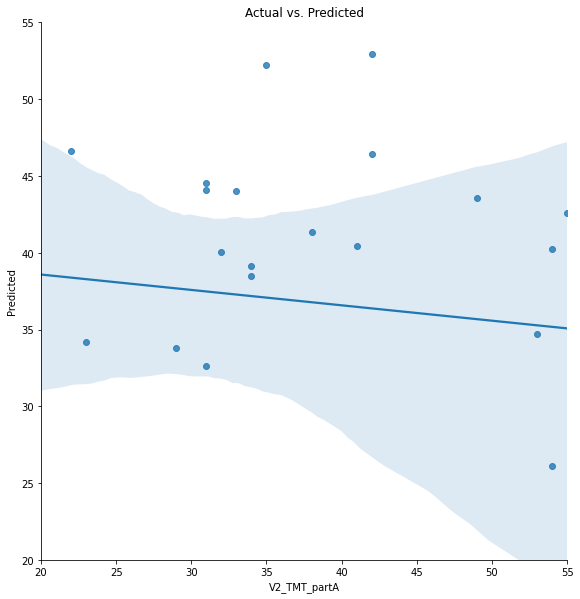

In [239]:
# Plotting the actual vs predicted values
sns.lmplot(x='V2_TMT_partA', y='Predicted', data=df_results, height=8).set(ylim=(20, 55), xlim=(20, 55))

plt.title('Actual vs. Predicted')

# V2_TMT_partB

In [240]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=1)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [241]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

-0.34389084427983696


In [242]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

89.17494528520874


In [243]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['V2_TMT_partB']) - abs(df_results['Predicted'])
print(df_results)

    V2_TMT_partB   Predicted   Residuals
46         65.00   97.881630  -32.881630
36        128.17  108.608749   19.561251
52        -95.00  103.421384   -8.421384
64         54.00  131.233375  -77.233375
84         72.00   73.472415   -1.472415
55        162.00  186.644844  -24.644844
94         82.00   78.109613    3.890387
50         45.00   85.374839  -40.374839
96        127.00 -107.010703   19.989297
98         61.00   67.507511   -6.507511
73         97.00   96.245588    0.754412
31        300.00  143.920476  156.079524
81        177.00   88.911387   88.088613
91        131.00   75.231427   55.768573
37        103.00  185.434740  -82.434740
61        204.00  169.829353   34.170647
45         90.00  149.954533  -59.954533
11        215.00  208.385004    6.614996
2         193.00  196.623097   -3.623097
44         77.00  117.224673  -40.224673
59        185.00  115.067513   69.932487
80        170.00   66.751006  103.248994
22        166.00  197.541912  -31.541912
97         56.00

<ipython-input-243-df976d68afd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-243-df976d68afd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['V2_TMT_partB']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

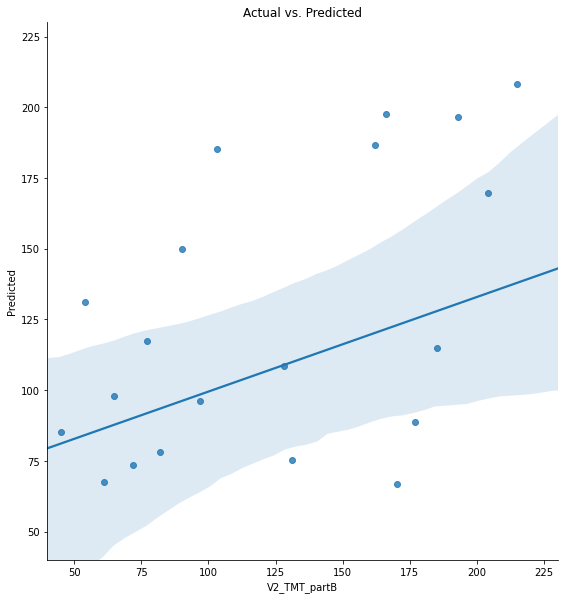

In [244]:
# Plotting the actual vs predicted values
sns.lmplot(x='V2_TMT_partB', y='Predicted', data=df_results, height=8).set(ylim=(40, 230), xlim=(40, 230))
plt.title('Actual vs. Predicted')

# V2_SCWT_score

In [245]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y3, random_state=1)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [246]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

-5.154054072440035


In [247]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

57.32853878356629


In [248]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['V2_SCWT_score']) - abs(df_results['Predicted'])
print(df_results)

    V2_SCWT_score   Predicted  Residuals
46           34.0   66.189437 -32.189437
36           33.0   46.694366 -13.694366
52           40.0   47.737249  -7.737249
64           64.5   65.756836  -1.256836
84           30.0   56.506603 -26.506603
55          105.0   82.839891  22.160109
94           65.0   55.994593   9.005407
50           40.0   40.281888  -0.281888
96           82.0 -112.233080 -30.233080
98           54.5   42.139286  12.360714
73           34.5   69.891858 -35.391858
31           33.5   62.921792 -29.421792
81           40.5   39.382044   1.117956
91           51.5   53.495703  -1.995703
37           34.0   81.790041 -47.790041
61           96.5   79.043425  17.456575
45           39.0   97.779958 -58.779958
11           32.0   95.278167 -63.278167
2            69.0   43.137126  25.862874
44           49.5   52.474606  -2.974606
59           74.5   45.118594  29.381406
80          101.0   33.778594  67.221406
22           49.5   78.470889 -28.970889
97           29.

<ipython-input-248-f882cbbc2b26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-248-f882cbbc2b26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['V2_SCWT_score']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

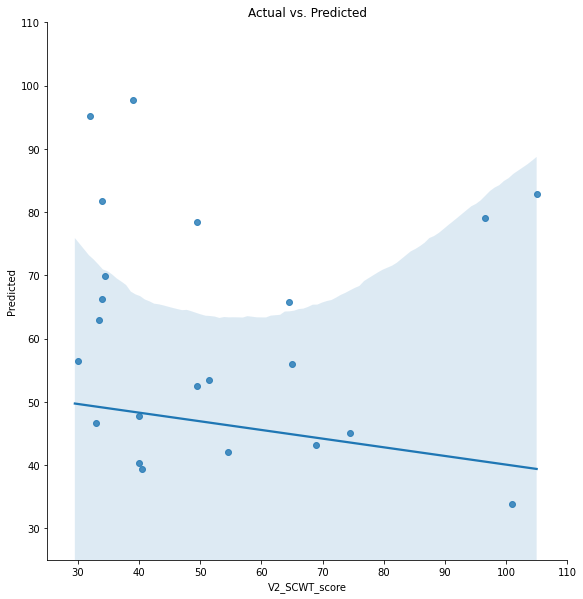

In [249]:
# Plotting the actual vs predicted values
sns.lmplot(x='V2_SCWT_score', y='Predicted', data=df_results, height=8).set(ylim=(25, 110), xlim=(25, 110))
plt.title('Actual vs. Predicted')

# V2_LFT_score

In [250]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y4, random_state=1)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [251]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

-0.6577743090281152


In [252]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

16.951243872288813


In [253]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['V2_LFT_score']) - abs(df_results['Predicted'])
print(df_results)

    V2_LFT_score  Predicted  Residuals
46          52.0  32.539909  19.460091
36          41.0  38.636249   2.363751
52          41.0  35.545209   5.454791
64          53.0  42.588691  10.411309
84          39.0  37.755856   1.244144
55          37.0  20.542597  16.457403
94          47.0  42.236602   4.763398
50          59.0  43.636580  15.363420
96          17.0  67.707454 -50.707454
98          27.0  36.686258  -9.686258
73          55.0  32.298274  22.701726
31          57.0  34.683321  22.316679
81          21.0  41.536643 -20.536643
91          34.0  26.812011   7.187989
37          29.0  40.608875 -11.608875
61          30.0  24.337568   5.662432
45          47.0  43.272848   3.727152
11          13.0  36.190490 -23.190490
2           23.0  30.380294  -7.380294
44          32.0  41.096452  -9.096452
59          34.0  44.910456 -10.910456
80          23.0  47.868566 -24.868566
22          40.0  33.656085   6.343915
97          56.0  63.573989  -7.573989


<ipython-input-253-c1f20484d6d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-253-c1f20484d6d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['V2_LFT_score']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

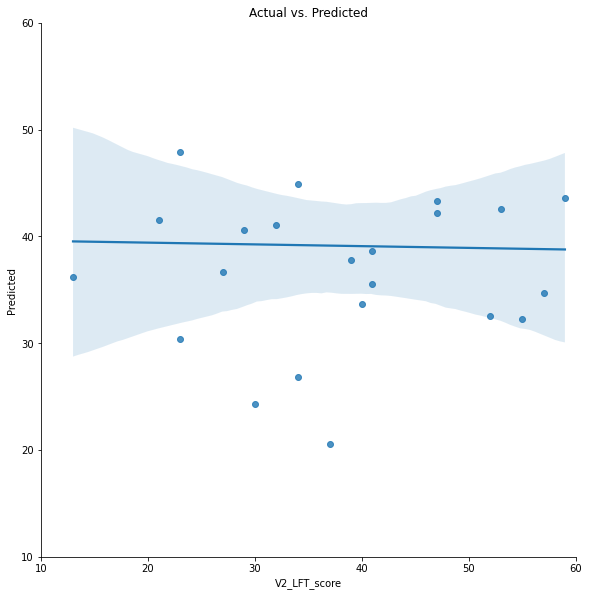

In [254]:
# Plotting the actual vs predicted values
sns.lmplot(x='V2_LFT_score', y='Predicted', data=df_results, height=8).set(ylim=(10, 60), xlim=(10, 60))
plt.title('Actual vs. Predicted')